In [1]:
from gensim.models import KeyedVectors, Word2Vec
from matplotlib import pyplot as plt
from math import log

In [2]:
model = Word2Vec.load("word2vec-cc100-cbow-d100-w3-min10.model")
model2 = Word2Vec.load("word2vec-cc100-cbow-d100-w3-min10-epochs200.model")
model3 = Word2Vec.load("word2vec-cc100-cbow-d100-w3-min10-epochs500.model")

In [3]:
len(model.wv.index_to_key)

79373

In [4]:
model.wv.index_to_key[:10]

['быць',
 'год',
 'беларускі',
 'беларусь',
 'чалавек',
 'магчы',
 'час',
 'усё',
 'дзень',
 'большыць']

In [5]:
model.wv.index_to_key[-10:]

['студзіна',
 'папугайскі',
 'гіпаплазія',
 'праінвеставаць',
 'замышляць',
 'зведанне',
 'тарпедаванне',
 'верхнякрывінскі',
 'прэзентаванне',
 'гусліст']

In [6]:
def word_frequency_per_most_similar_rank(pivot_word, model):
    frequencies = []
    for word, similarity in model.wv.most_similar(pivot_word, topn=len(model.wv.index_to_key)):
        frequencies.append(model.wv.get_vecattr(word,"count"))
    y = [log(f) for f in frequencies]
    x = range(0, len(y))
    plt.ylabel('log-frequency of word')
    plt.xlabel(f'rank of similarity to "{pivot_word}"')
    plt.scatter(x, y, alpha=0.005)

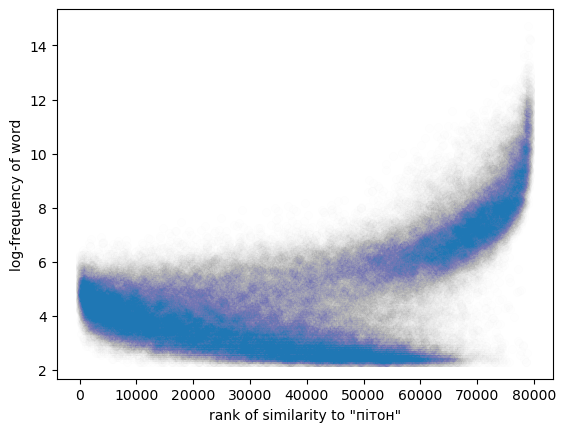

In [7]:
word_frequency_per_most_similar_rank('пітон', model)

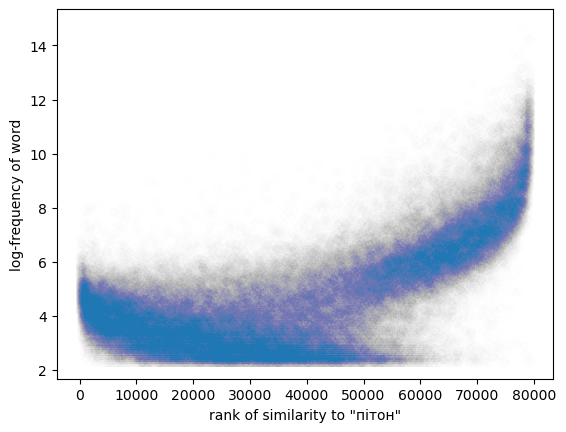

In [8]:
word_frequency_per_most_similar_rank('пітон', model2)

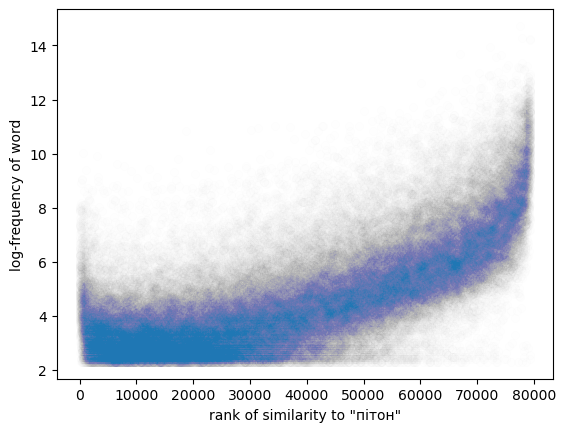

In [9]:
word_frequency_per_most_similar_rank('пітон', model3)